In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
helmet_pd = pd.read_csv("/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/imageLabels.csv")
helmet_pd.head()

,image,label,left,width,top,height
0,57502_000480_Endzone_frame0495.jpg,Helmet,403,30,296,33
1,57502_000480_Endzone_frame0495.jpg,Helmet,421,27,335,41
2,57502_000480_Endzone_frame0495.jpg,Helmet,439,24,374,49
3,57502_000480_Endzone_frame0495.jpg,Helmet,457,21,413,57
4,57502_000480_Endzone_frame0495.jpg,Helmet,475,18,452,65


In [ ]:
list_images = helmet_pd['image'].unique()
len(list_images)

1200

In [ ]:
from sklearn.model_selection import train_test_split

lst_train, lst_valid = train_test_split(list_images, test_size=0.1, random_state=42)
print(len(lst_train))
print(len(lst_valid))

1080
120


In [ ]:
W, H = 1280, 720
def create_dataset(list_images, data_type):
    for image in list_images:
        df = helmet_pd[helmet_pd["image"]==image]
        file_name = image.split(".")[0] + ".txt"
        content = []
        for index, row in df.iterrows():
            center_x = (row['left'] + (row['width'] / 2)) / W
            center_y = (row['top'] + (row['height'] / 2)) / H
            box_w = row['width'] / W
            box_h = row['height'] / H
            row = " ".join(["0", str(center_x), str(center_y), str(box_w), str(box_h)])
            content.append(row)
        file = open("/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/" + data_type + "/" + file_name, "w")
        file.write("\n".join(content))
        file.close()

In [ ]:
create_dataset(lst_train, "train")
create_dataset(lst_valid, "valid")

In [ ]:
%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/Dataset(images)
!ls -F | grep .jpg | wc -l
%cd ..

/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/Dataset(images)
1200
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet


In [ ]:
from shutil import copyfile
import os

def copy_images(lst_images, dst_dir):
    for img in lst_images:
        src = os.path.join('/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/Dataset(images)/', img)
        dst = os.path.join(dst_dir, img) 
        copyfile(src, dst)

In [ ]:
copy_images(lst_train, "/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/train")
copy_images(lst_valid, "/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/valid")

**Preview One Image**

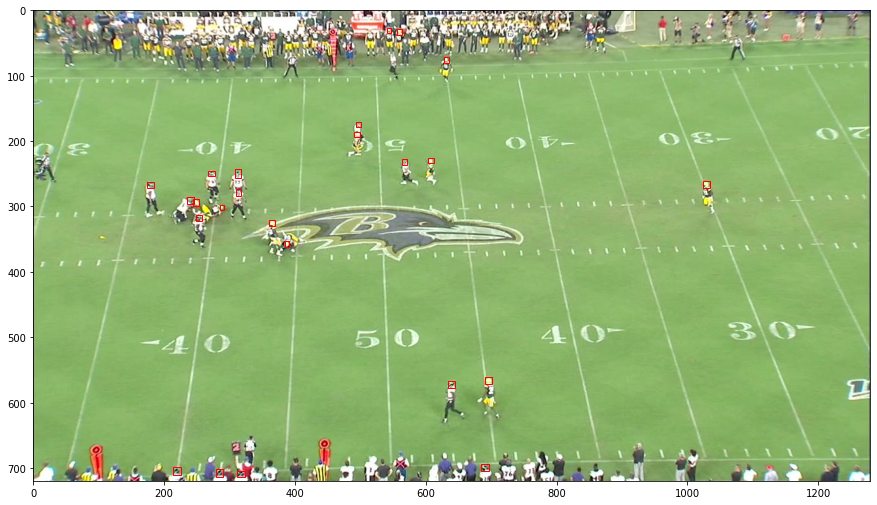

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

file_name = random.choice(lst_train).split(".")[0]

label_path = "/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/train/"+file_name+".txt"
fl = open(label_path, 'r')
data = fl.read().split("\n")
fl.close()

im = Image.open('/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/train/'+file_name+'.jpg')
# Create figure and axes
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
# Display the image
ax.imshow(im)

for dt in data:
    dt = dt.strip()
    li, x, y, w, h, = map(float, dt.split(' '))
    
    l = int((x - w / 2) * W)
    r = int((x + w / 2) * W)
    t = int((y - h / 2) * H)
    b = int((y + h / 2) * H)

    # Create a Rectangle patch
    rect = patches.Rectangle((l, t), r-l, b-t, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [ ]:
%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git checkout v6.0
!pip install -r requirements.txt

/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet
Cloning into 'yolov5'...
remote: Enumerating objects: 10491, done.
remote: Total 10491 (delta 0), reused 0 (delta 0), pack-reused 10491
Receiving objects: 100% (10491/10491), 10.70 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (7245/7245), done.
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/yolov5
error: Your local changes to the following files would be overwritten by checkout:
	.gitignore
	data/scripts/download_weights.sh
	requirements.txt
	utils/datasets.py
	utils/general.py
Please commit your changes or stash them before you switch branches.
Aborting


In [ ]:
%%writefile NFL.yaml

train: /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/train
val: /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/valid

# number of classes
nc: 1

# class names
names: ['Helmet']

Writing NFL.yaml


In [ ]:
!nvidia-smi

Mon Jan 10 14:33:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [ ]:
%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/train
!ls -F | grep .txt | wc -l
%cd ..

%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/valid
!ls -F | grep .txt | wc -l
%cd ..

%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/train
!ls -F | grep .jpg | wc -l
%cd ..

%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/valid
!ls -F | grep .jpg | wc -l
%cd ..

/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/train
1080
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels/valid
120
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/labels
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/train
1080
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images/valid
120
/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/images


In [ ]:
%cd /content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/yolov5

/content/gdrive/Shareddrives/Balance Unlimited/Robot Projek 2/Helmet/yolov5


In [ ]:
!WANDB_MODE="disabled" python train.py --img 1280 --batch 8 --epochs 15 --data NFL.yaml --weights yolov5m6.pt 

train: weights=yolov5m6.pt, cfg=, data=NFL.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=15, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2022-1-10 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0